In [1]:
from utils.mcmc import \
    gerar_grafo_inicial, \
    propoe_novo_grafo, \
    metrica_eficiencia, \
    criador_grafo_mcmc

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
entradas = [
    (16,20),
    (20,25),
    (28,31),
    (29,30),
    (32,50),
    (32,60)
]

In [3]:
def acha_melhor_aleatorio(n_vertices, n_arestas, iteracoes):
    evolucao = list()
    evolucao_melhor = list()

    atual = gerar_grafo_inicial(n_vertices,n_arestas)
    melhor = gerar_grafo_inicial(n_vertices,n_arestas)
    for i in range(iteracoes-1):
        novo = propoe_novo_grafo(atual)
        evolucao.append(metrica_eficiencia(novo))

        if metrica_eficiencia(novo) > metrica_eficiencia(melhor):
            melhor = novo
        
        if metrica_eficiencia(novo) > metrica_eficiencia(atual):
            atual = novo
            
        evolucao_melhor.append(metrica_eficiencia(melhor))
    return melhor, evolucao, evolucao_melhor

In [4]:
eficiencia_aleatorio = list()
eficiencia_mcmc = list()

for i in range(100):
    melhor, evo, evo_melhor = acha_melhor_aleatorio(20, 25, 100)
    eficiencia_aleatorio.append( evo_melhor[-1] )

    ultimo, melhor, metricas, metricas_melhor = criador_grafo_mcmc(20, 25, 100)
    eficiencia_mcmc.append( metrica_eficiencia(melhor) )

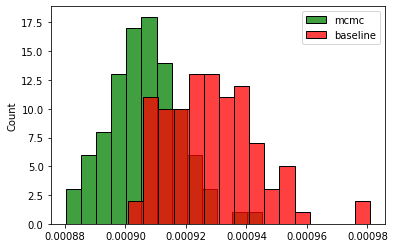

In [5]:
sns.histplot(eficiencia_mcmc, color='green', binwidth=0.000005)
sns.histplot(eficiencia_aleatorio, color='red', binwidth=0.000005)

plt.legend(labels=['mcmc','baseline'])

In [6]:
from datetime import datetime

def compara_baseline(v, a, i=1000):
    ultimo, melhor, metricas, metricas_melhor = criador_grafo_mcmc(v, a, i)

    plt.figure(figsize = (10,2))
    sns.lineplot(
        x=list(range(len(metricas_melhor))),
        y=np.array(metricas_melhor)[:,1],
        color='green'
    )

    melhor, metricas, metricas_melhor = acha_melhor_aleatorio(v, a, i)

    sns.lineplot(
        x=list(range(len(metricas_melhor))),
        y=np.array(metricas_melhor),
        color='red'
    )
    plt.legend(labels=['mcmc','baseline'])
    plt.savefig('imgs/mcmc_baseline_compara_melhor_{}.png'.format((v,a)))


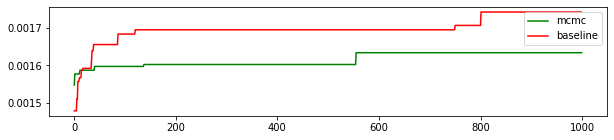

In [7]:
compara_baseline(16,20)